# Week 9 Problem Set

## Cohort Session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**CS0.** *Plot:* Read data for Boston Housing Prices and write a function `get_features_targets()` to get the columns for the features and the targets from the input argument data frame. The function should take in Pandas' dataframe and two lists. The first list is for the feature names and the other list is for the target names. 

We will use the following columns for our test cases:
- x data: RM column - use z normalization (standardization)
- y data: MEDV column

**Make sure you return a new data frame for both the features and the targets.**

We will normalize the feature using z normalization. Plot the data using scatter plot. 



In [3]:
def normalize_z(df):
    ### BEGIN SOLUTION
    return (df - df.mean(axis=0)) / df.std(axis=0) # remember what axis is for
    ### END SOLUTION 
    pass

In [4]:
def get_features_targets(df, feature_names, target_names):
    ### BEGIN SOLUTION
    df_feature = df[feature_names]
    df_target = df[target_names]
    ### END SOLUTION
    return df_feature, df_target

In [5]:
df = pd.read_csv("housing_processed.csv") #raw data
df_feature, df_target = get_features_targets(df,["RM"],["MEDV"]) # "RM" col is the sel feature for LR, "MEDV" col is the sel target 
df_feature = normalize_z(df_feature)
# Why normalise the feature?
# Normalisation brings all features within similar range
# So we won't need to compute too large values later on during gradient descent 

# Why we DONT normalise the target? 
# because we want to predict the absolute value of the target 
# eg: it doesnt make sense to predict housing price that is normalised -- You want to know and predict the actual price


assert isinstance(df_feature, pd.DataFrame)
assert isinstance(df_target, pd.DataFrame)
assert np.isclose(df_feature.mean(), 0.0)
assert np.isclose(df_feature.std(), 1.0)
assert np.isclose(df_target.mean(), 22.532806)
assert np.isclose(df_target.std(), 9.1971)


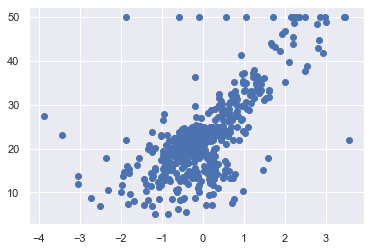

In [6]:
sns.set()
plt.scatter(df_feature, df_target)

**CS1.** *Cost Function:* Write a function `compute_cost()` to compute the cost function of a linear regression model. The function should take in two 2-D numpy arrays. The first one is the matrix of the linear equation and the second one is the actual target value.

Recall that:

$$J(\hat{\beta}_0, \hat{\beta}_1) = \frac{1}{2m}\Sigma^m_{i=1}\left(\hat{y}(x^i)-y^i\right)^2$$

where

$$\hat{y}(x^i) = \hat{\beta}_0 + \hat{\beta}_1 x^i$$

The function should receive a numpy array, so we will need to convert to numpy array and change the shape. To do this, we will create two other functions:
- `prepare_feature(df)`: which takes in a data frame for the feature. The function should convert the data frame to a numpy array and change it into a column vector. The function should also add a column of constant 1s in the first column.
- `prepare_target(df)`: which takes in a data frame for the target. The function should simply convert the data frame to a numpy array and change it into column vectors. **The function should be able to handle if the data frame has more than one column.**

You can use the following methods in your code:
- `df.to_numpy()`: which is to convert a Pandas data frame to Numpy array.
- `np.reshape(row, col)`: which is to reshape the numpy array to a particular shape.
- `np.concatenate((array1, array2), axis)`: which is to join a sequence of arrays along an existing axis.
- `np.matmul(array1, array2)`: which is to do matrix multiplication on two Numpy arrays.


In [7]:
def compute_cost(X, y, beta):
    J = 0
    ### BEGIN SOLUTION
    # X is n by 2
    number_of_samples = X.shape[0] #---> number of column samples 
    # print(number_of_samples) 
    error = np.matmul(X, beta) - y # before squaring
    error_sq = np.matmul(error.T, error) 
    J = (1)/(2*number_of_samples) * error_sq # J here is a numpy array 
    ### END SOLUTION
    return J[0][0] # return the scalar value of the error

# feat target
# 100 100
# 200 200
# 300 300
# 400 400
# 500 500 
# y = x --> beta0 = 0, beta1 = 1

# if normalise the feat:
# ? 100
# ? 200
# ? 300
# ? 400
# ? 500
#  --> normalising the feature will still give you the y=beta0 + beta1*x --> Linear relationship 



In [8]:
# this function returns feature matrix
# [[ 1 x0 ]
# [ 1 x1 ]
# ... ]]
def prepare_feature(df_feature):
    ### BEGIN SOLUTION
    # we want to add columns of 1s to X as its first column
    cols = len(df_feature.columns) # this will be just 1 in linear reg because we only select ONE feature
    # extract the columns [1:end] from the df_feature dataframe
    # we don't want the first column of df_feature 
    # to_numpy() removes the first column (header column)
    feature = df_feature.to_numpy()
    number_of_samples = feature.shape[0]
    # create column of ones np.ones((feature.shape[0],1))
    # concatenate with feature, in axis=1 --> add another column to the output
    return np.concatenate((np.ones((number_of_samples, cols)), feature), axis=1)
    ### END SOLUTION

In [9]:
def prepare_target(df_target):
    ### BEGIN SOLUTION
    # extract the columns [1:end] from the df_target dataframe
    # we don't want the first column of df_target 
    # to_numpy() removes the first column (header column)
    return df_target.to_numpy()
    ### END SOLUTION
    pass

In [10]:
X = prepare_feature(df_feature) # matrix of size n by 2
target = prepare_target(df_target) # vector of size n

assert isinstance(X, np.ndarray)
assert isinstance(target, np.ndarray)
assert X.shape == (506, 2)
assert target.shape == (506, 1)

In [11]:
# print(X)
beta = np.zeros((2,1))
print(beta)
J = compute_cost(X, target, beta)
print(J)
assert np.isclose(J, 296.0735)
print("--------------------------------------")

beta = np.ones((2,1))
print(beta)
J = compute_cost(X, target, beta)
print(J)
assert np.isclose(J, 268.157)
print("--------------------------------------")

print(np.array([-1, 2]))
beta = np.array([-1, 2]).reshape((2,1))
print(beta)
J = compute_cost(X, target, beta)
print(J)
assert np.isclose(J, 308.337)


[[0.]
 [0.]]
296.0734584980237
--------------------------------------
[[1.]
 [1.]]
268.15700514868996
--------------------------------------
[-1  2]
[[-1]
 [ 2]]
308.3369944871033


**CS2.** *Gradient Descent:* Write a function called `gradient_descent()` that takes in these parameters:
- `X`: is a 2-D numpy array for the features
- `y`: is a vector array for the target
- `beta`: is a column vector for the initial guess of the parameters
- `alpha`: is the learning rate
- `num_iters`: is the number of iteration to perform

The function should return two numpy arrays:
- `beta`: is coefficient at the end of the iteration
- `J_storage`: is the array that stores the cost value at each iteration

You can use some of the following functions:
- `np.matmul(array1, array2)`: which is to do matrix multiplication on two Numpy arrays.
- `compute_cost()`: which the function you created in the previous problem set to compute the cost.

In [12]:
def gradient_descent(X, y, beta, alpha, num_iters):
    ### BEGIN SOLUTION
    number_of_samples = X.shape[0]
    J_storage = []
    for i in range(num_iters):
        # STEP 2: compute the derivate with current parameters
        derivative_error = (1/(number_of_samples)) * np.matmul(X.T, (np.matmul(X, beta) - y))
        # STEP 3: update the parameters
        beta = beta - alpha *  derivative_error
        # compute cost at every iteration of beta
        J_storage.append(compute_cost(X, y, beta))
    ### END SOLUTION
    return beta, J_storage

In [13]:
iterations = 1500 # number of loops between STEP 2 and STEP 3 
alpha = 0.01 # learning rate
beta = np.zeros((2,1)) # STEP 1: guess beta
print(beta)

beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
print(beta)
# print(J_storage)
assert np.isclose(beta[0], 22.5328)
assert np.isclose(beta[1], 6.3953)

[[0.]
 [0.]]
[[22.53279993]
 [ 6.39529594]]


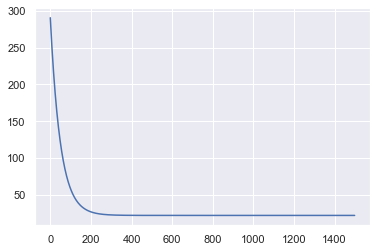

In [14]:
plt.plot(J_storage)

**CS3.** *Predict:* Write two functions `predict()` and `predict_norm()` that calculate the straight line equation given the features and its coefficient.
- `predict()`: this function should standardize the feature using z normalization, change it to a Numpy array, and add a column of constant 1s. You should use `prepare_feature()` for this purpose. Lastly, this function should also call `predict_norm()` to get the predicted y values.
- `predict_norm()`: this function should calculate the straight line equation after standardization and adding of column for constant 1.

You can use some of the following functions:
- `np.matmul(array1, array2)`: which is to do matrix multiplication on two Numpy arrays.
- `normalize_z(df)`: which is to do z normalization on the data frame.

In [15]:
def predict_norm(X, beta):
    ### BEGIN SOLUTION
    return np.matmul(X,beta) # the straight line regression equation Xb
    ### END SOLUTION
    pass

In [16]:
def predict(df_feature, beta):
    ### BEGIN SOLUTION
    X = prepare_feature(normalize_z(df_feature))
    return predict_norm(X, beta)
    ### END SOLUTION
    pass

In [17]:
df_feature, buf = get_features_targets(df, ["RM"], [])
beta = [[22.53279993],[ 6.39529594]] # from previous result
pred = predict(df_feature, beta)

assert isinstance(pred, np.ndarray)
assert pred.shape == (506, 1)
assert np.isclose(pred.mean(), 22.5328)
assert np.isclose(pred.std(), 6.38897)

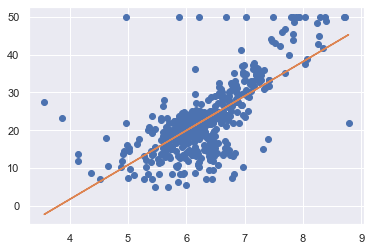

In [18]:
plt.plot(df_feature["RM"],target,'o') # this is scatter plot from train set
plt.plot(df_feature["RM"],pred,'-')

**CS4.** *Splitting data:* Do the following tasks:
- Read RM as the feature and MEDV as the target from the data frame.
- Use Week 9's function `split_data()` to split the data into train and test using `random_state=100` and `test_size=0.3`. 
- Normalize and prepare the features and the target.
- Use the training data set and call `gradient_descent()` to obtain the `theta`.
- Use the test data set to get the predicted values.

You need to replace the `None` in the code below with other a function call or any other Python expressions. 

In [19]:
def split_data(df_feature, df_target, random_state=100, test_size=0.3):
    ### BEGIN SOLUTION
    # get the indexes of the feature 
    indexes = df_feature.index
    # seed the random value 
    if random_state != None:
        np.random.seed(random_state)
    # get the number of test samples to extract 
    k = int(test_size * len(indexes))
    # get the indexes from the features and target to select as test set 
    test_index = np.random.choice(indexes, k, replace=False)
    indexes = set(indexes)
    test_index = set(test_index)
    train_index = indexes - test_index
    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]
    ### END SOLUTION
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  

In [20]:
# Select features and targets from raw data frame
df_feature, df_target = get_features_targets(df, ["RM"], ["MEDV"])

# split the data into training and test data sets
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target)

# normalize the feature using z normalization
df_feature_train_z = normalize_z(df_feature_train)

# get the X matrix of n by 2
X = prepare_feature(df_feature_train_z)
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((2,1)) # STEP 1 of grad desc: guess

# call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict method to get the predicted values from learned beta
pred = predict(df_feature_test, beta) 


In [21]:

assert isinstance(pred, np.ndarray)
assert pred.shape == (151, 1)
assert np.isclose(pred.mean(), 22.66816)
assert np.isclose(pred.std(), 6.257265)


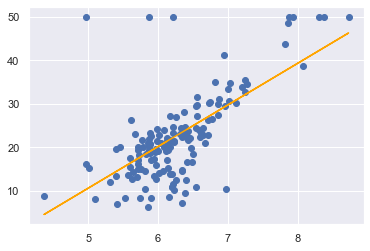

In [22]:
plt.scatter(df_feature_test, df_target_test) # this is scatter plot from test set
plt.plot(df_feature_test, pred, color="orange")

**CS5.** *R2 Coefficient of Determination:* Write a function to calculate the coefficient of determination as given by the following equations.

$$r^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

where

$$SS_{res} = \Sigma_{i=1}^n (y_i - \hat{y}_i)^2$$ where $y_i$ is the actual target value and $\hat{y}_i$ is the predicted target value.

$$SS_{tot} = \Sigma_{i=1}^n (y_i - \overline{y})^2$$

where 
$$ \overline{y} = \frac{1}{n} \Sigma_{i=1}^n y_i$$
and $n$ is the number of target values.

You can use the following functions in your code:
- `np.mean(array)`: which is to get the mean of the array. You can also call it using `array.mean()`.
- `np.sum(array)`: which is to sum the array along a default axis. You can specify which axis to perform the summation.

In [23]:
def r2_score(y, ypred):
    ### BEGIN SOLUTION
    # (nparray1 - nparray2) --> element-wise sub
    y_mean = np.mean(y)
    ss_res = np.sum((y-ypred)**2)
    ss_tot = np.sum((y - y_mean)**2)
    return 1 - (ss_res/ss_tot)
    ### END SOLUTION
    pass

In [24]:
target = prepare_target(df_target_test)
r2 = r2_score(target, pred)
print(r2)
assert np.isclose(r2, 0.45398)

0.45398075454064146


**CS6.** *Mean Squared Error:* Create a function to calculate the MSE as given below.

$$MSE = \frac{1}{n}\Sigma_{i=1}^n(y^i - \hat{y}^i)^2$$


In [25]:
def mean_squared_error(target, pred):
    ### BEGIN SOLUTION
    n = target.shape[0]
    return 1/n * np.sum((target-pred)**2)
    ### END SOLUTION
    pass

In [26]:
mse = mean_squared_error(target, pred)
assert np.isclose(mse, 53.6375)

**CS8.** *Optional:* Redo the above tasks using Sci-kit learn libraries. You will need to use the following:
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
- [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
# Read the CSV and extract the features
df = pd.read_csv("housing_processed.csv")
df_feature, df_target = get_features_targets(df, ["RM"], ["MEDV"])
# normalize
df_feature = normalize_z(df_feature) # all data, both train set and test set


In [28]:
# Use sklearn lib 


# 1. Prep the dataset: split the data into training and test data set using scikit-learn function
df_feature_train, df_feature_test, df_target_train, df_target_test = train_test_split(df_feature, df_target, random_state=100, test_size=0.3)

# Instantiate LinearRegression() object
model = LinearRegression() # instance of LinearRegression class in sklearn lib
model.fit(df_feature_train, df_target_train)

# if all your 3 samples "matter" equally: 
#E = (y1-ypred1)^2 +  (y2-ypred2)^2 + (y3-ypred3)^2
# or you can add weight to them:
#E = w1(y1-ypred1)^2 +  w2(y2-ypred2)^2 + w3(y3-ypred3)^2
# w1=0.7, w2=0.2, w3=0.1 --> sample weights


print(model.coef_, model.intercept_) # print the params
assert np.isclose(model.coef_,[6.05090511]) # b1
assert np.isclose(model.intercept_, 22.52999668) # b0

[[6.05090511]] [22.52999668]


In [30]:
# Call the predict() method
pred = model.predict(df_feature_test)


print(type(pred), pred.mean(), pred.std())
assert isinstance(pred, np.ndarray)
assert np.isclose(pred.mean(), 22.361699)
assert np.isclose(pred.std(), 5.7011267)

<class 'numpy.ndarray'> 22.3616994893565 5.7011267141173


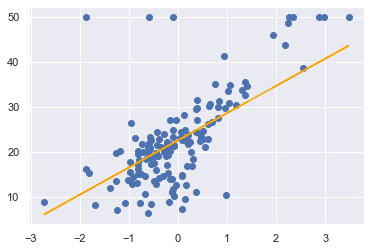

In [31]:
plt.scatter(df_feature_test, df_target_test)
plt.plot(df_feature_test, pred, color="orange")

In [32]:
r2 = r2_score(df_target_test, pred)
print(r2)
assert np.isclose(r2, 0.457647)

0.45764736329252076


In [33]:
mse = mean_squared_error(df_target_test, pred)
print(mse)
assert np.isclose(mse, 54.93216)

54.93216051758423
